In [1]:
import pandas as pd 
import numpy as numpy 
import matplotlib.pyplot as plt
import seaborn as sns 

In [2]:
data_Fraud=pd.read_csv("./Data/Fraud_Data.csv")
data_Fraud.head()

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,7.327584e+08,0
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,3.503114e+08,0
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2.621474e+09,1
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,44,ATGTXKYKUDUQN,SEO,Safari,M,41,3.840542e+09,0
4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,39,NAUITBZFJKHWW,Ads,Safari,M,45,4.155831e+08,0


In [3]:
data_Ip=pd.read_csv("./Data/IpAddress_to_Country.csv")
data_Ip.head()

,lower_bound_ip_address,upper_bound_ip_address,country
0,16777216.0,16777471,Australia
1,16777472.0,16777727,China
2,16777728.0,16778239,China
3,16778240.0,16779263,Australia
4,16779264.0,16781311,China


In [4]:
data_creditcard=pd.read_csv("./Data/creditcard.csv")
data_creditcard.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [6]:
data_Fraud.isnull().sum()

user_id           0
signup_time       0
purchase_time     0
purchase_value    0
device_id         0
source            0
browser           0
sex               0
age               0
ip_address        0
class             0
dtype: int64

In [7]:
data_Ip.isnull().sum()

lower_bound_ip_address    0
upper_bound_ip_address    0
country                   0
dtype: int64

In [8]:
data_creditcard.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [9]:
data_Fraud.dtypes

user_id             int64
signup_time        object
purchase_time      object
purchase_value      int64
device_id          object
source             object
browser            object
sex                object
age                 int64
ip_address        float64
class               int64
dtype: object

In [10]:
data_Ip.dtypes

lower_bound_ip_address    float64
upper_bound_ip_address      int64
country                    object
dtype: object

In [12]:
data_creditcard.dtypes

Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object

In [5]:
data_Fraud["signup_time"]=pd.to_datetime(data_Fraud["signup_time"])
data_Fraud["purchase_time"]=pd.to_datetime(data_Fraud["purchase_time"])
data_Fraud.dtypes

user_id                    int64
signup_time       datetime64[ns]
purchase_time     datetime64[ns]
purchase_value             int64
device_id                 object
source                    object
browser                   object
sex                       object
age                        int64
ip_address               float64
class                      int64
dtype: object

In [14]:
x=data_Fraud["browser"].nunique()
print(x)

5


In [15]:
duplicates = data_Fraud[data_Fraud.duplicated()]
print(duplicates)

Empty DataFrame
Columns: [user_id, signup_time, purchase_time, purchase_value, device_id, source, browser, sex, age, ip_address, class]
Index: []


In [16]:
duplicates_Ip = data_Ip[data_Ip.duplicated()]
print(duplicates_Ip)

Empty DataFrame
Columns: [lower_bound_ip_address, upper_bound_ip_address, country]
Index: []


In [17]:
print(data_creditcard.shape)
print(data_Fraud.shape)
print(data_Ip.shape)

(284807, 31)
(151112, 11)
(138846, 3)


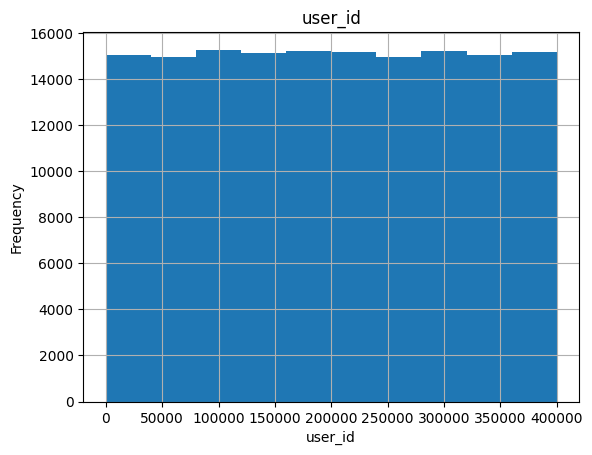

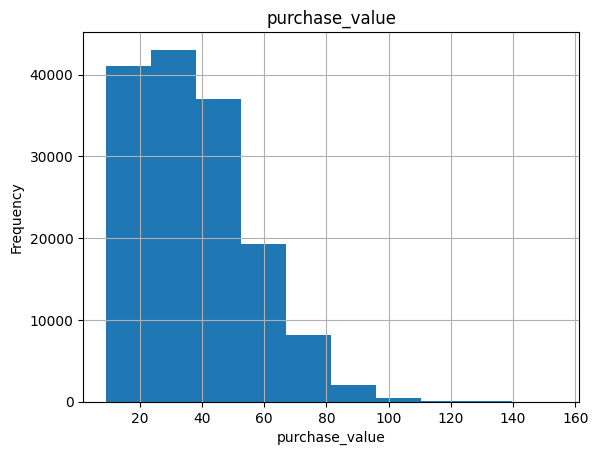

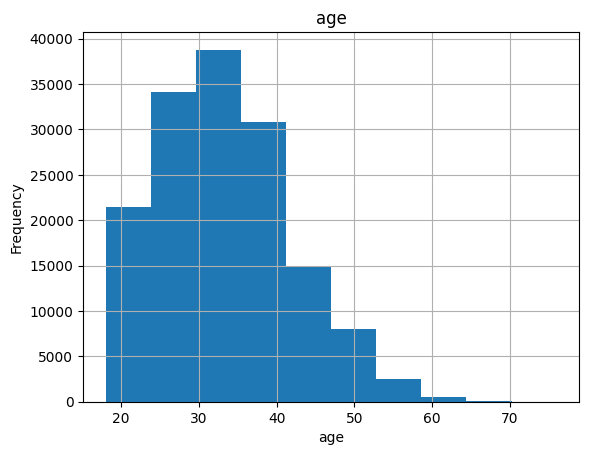

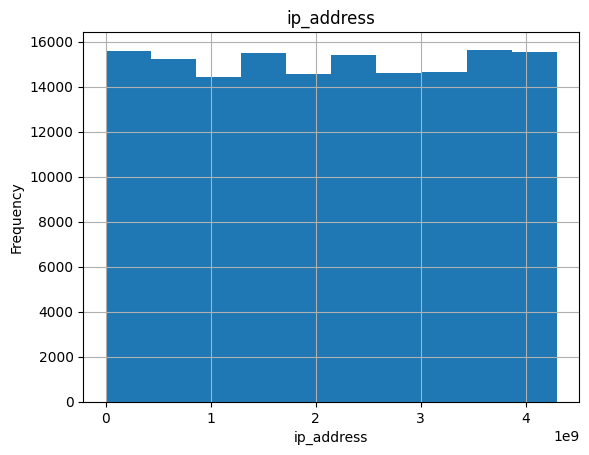

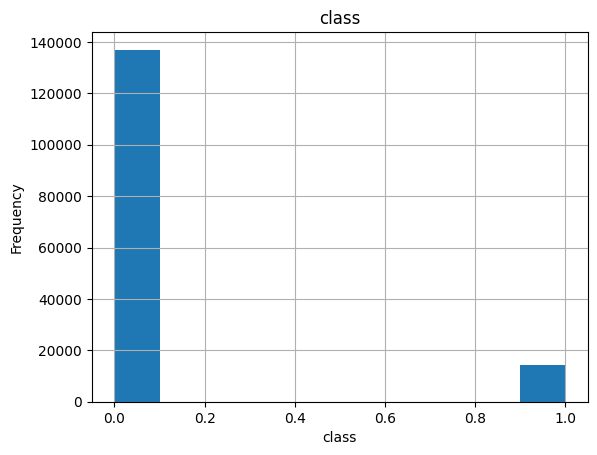

In [18]:
num_col_fraude = []
cata_col_fraude = []

for col in data_Fraud.columns:
    if pd.api.types.is_numeric_dtype(data_Fraud[col]):  
        num_col_fraude.append(col)
    elif pd.api.types.is_object_dtype(data_Fraud[col]):  
        cata_col_fraude.append(col)

for col in num_col_fraude:
    data_Fraud[col].describe() 
    data_Fraud[col].hist()      
    plt.title(col)              
    plt.xlabel(col)             
    plt.ylabel('Frequency')     
    plt.show() 



In [19]:
cata_col_fraude.remove("device_id")

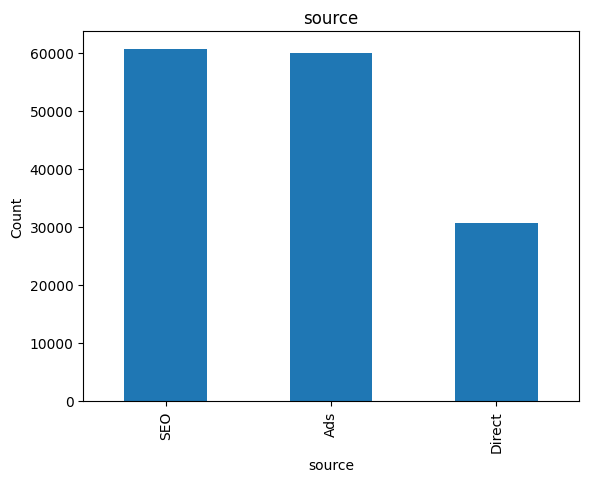

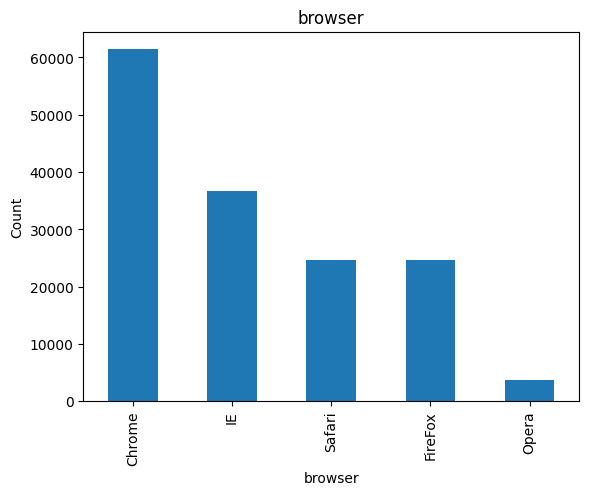

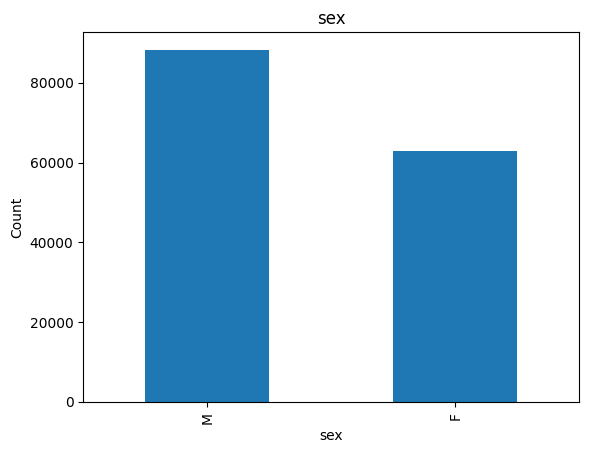

In [20]:
for col in cata_col_fraude:
    data_Fraud[col].value_counts().plot(kind='bar') 
    plt.title(col)                                  
    plt.xlabel(col)                                  
    plt.ylabel('Count')                              
    plt.show()

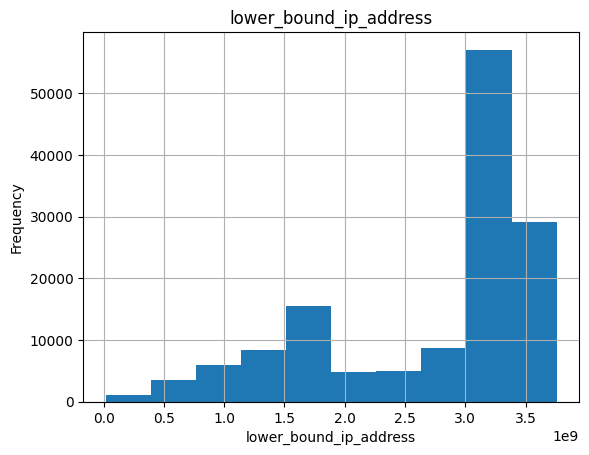

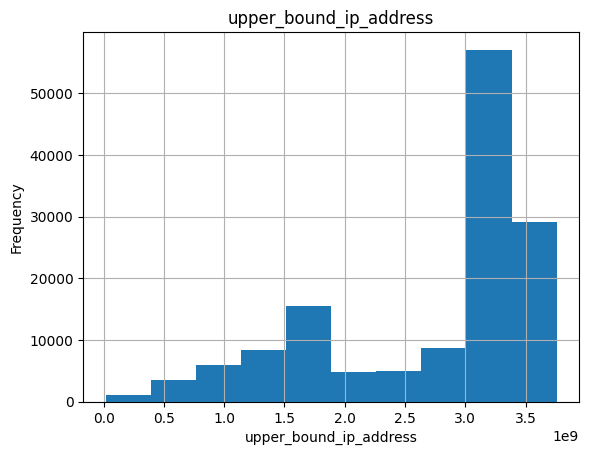

In [21]:
num_col_Ip= []
cata_col_Ip = []
for col in data_Ip.columns:
    if pd.api.types.is_numeric_dtype(data_Ip[col]): 
        num_col_Ip.append(col)
    elif pd.api.types.is_object_dtype(data_Ip[col]): 
        cata_col_Ip.append(col)
for col in num_col_Ip:
    data_Ip[col].describe()  
    data_Ip[col].hist()      
    plt.title(col)             
    plt.xlabel(col)            
    plt.ylabel('Frequency')    
    plt.show() 


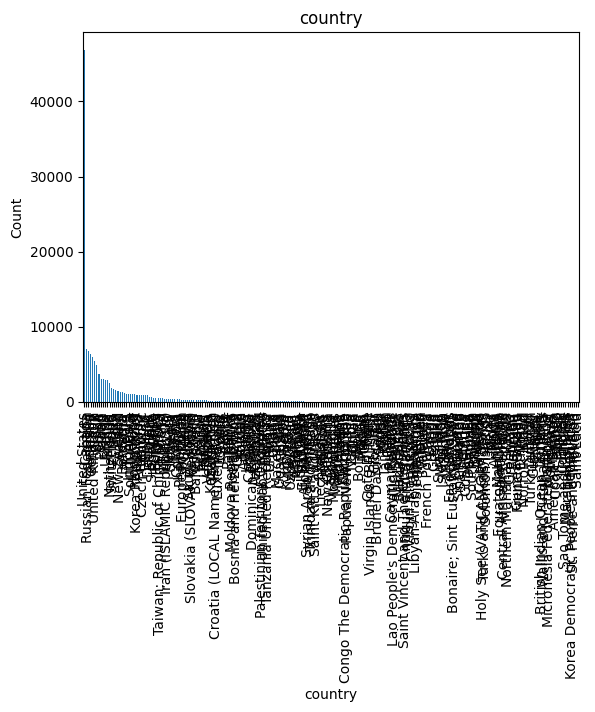

In [22]:
for col in cata_col_Ip:
    data_Ip[col].value_counts().plot(kind='bar') 
    plt.title(col)                                  
    plt.xlabel(col)                                  
    plt.ylabel('Count')                              
    plt.show()

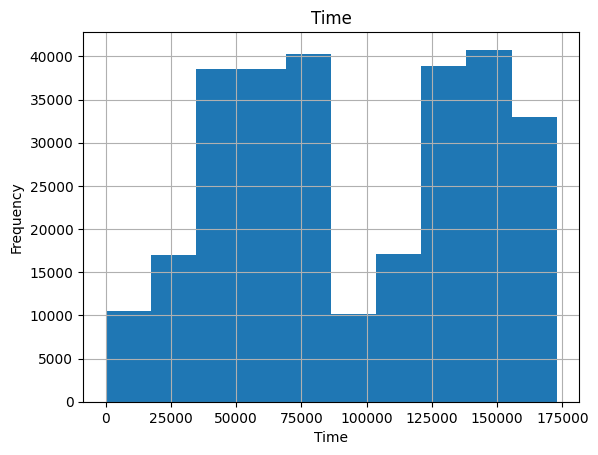

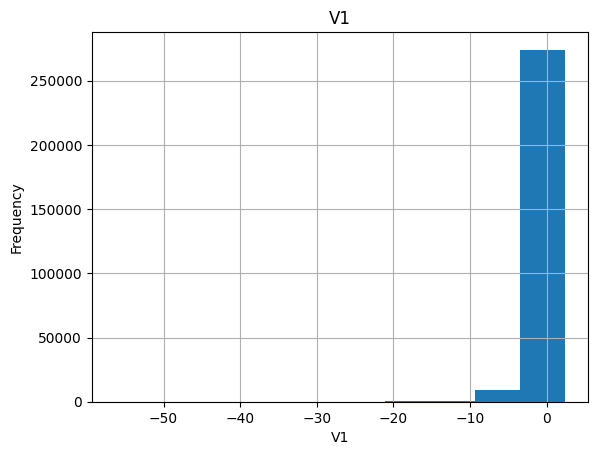

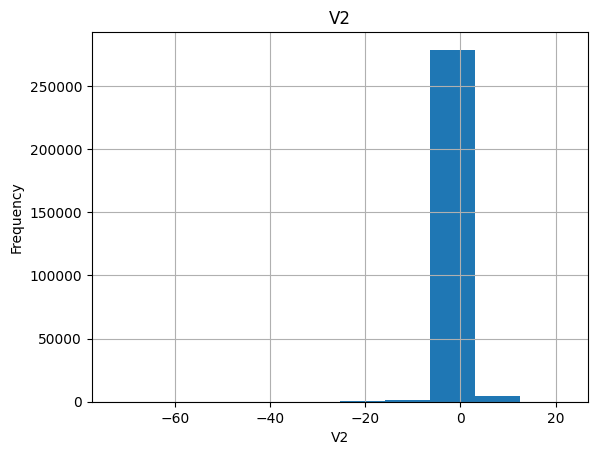

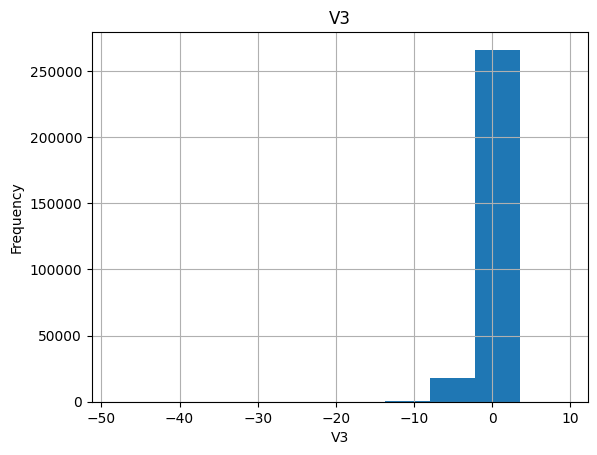

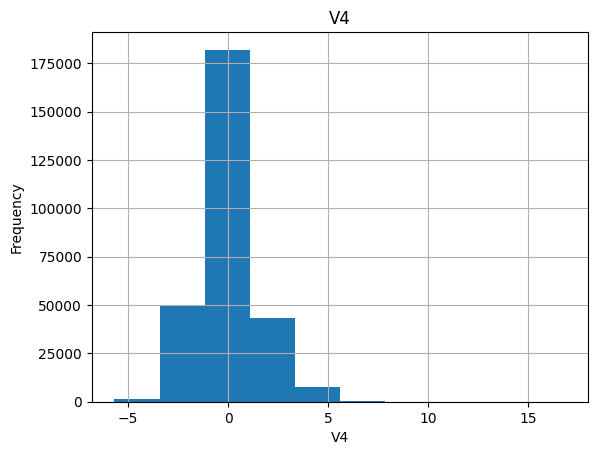

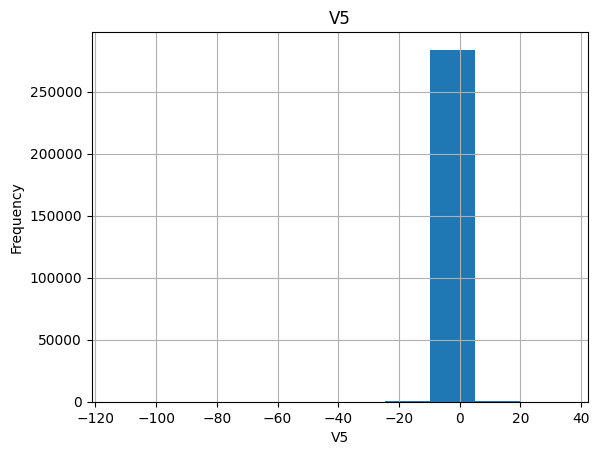

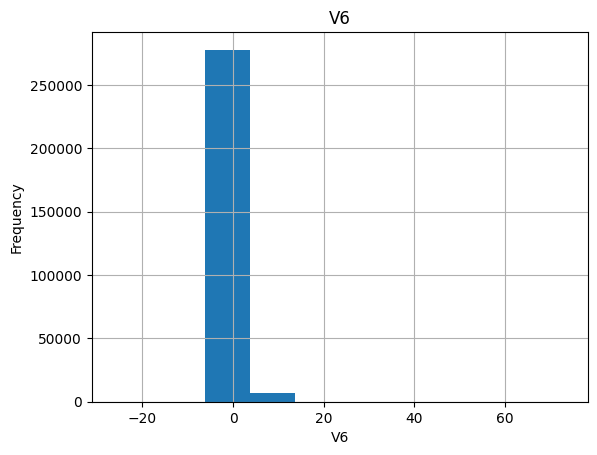

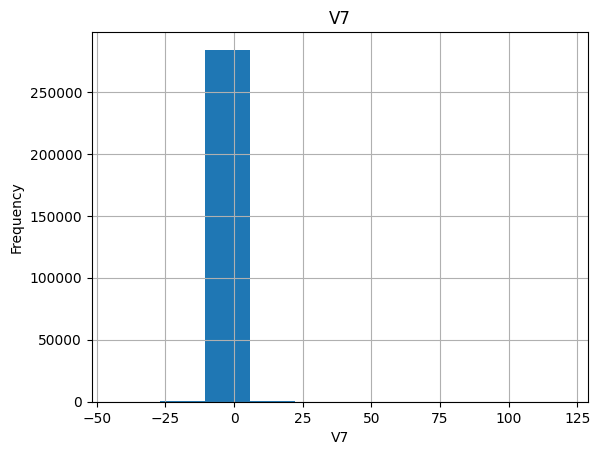

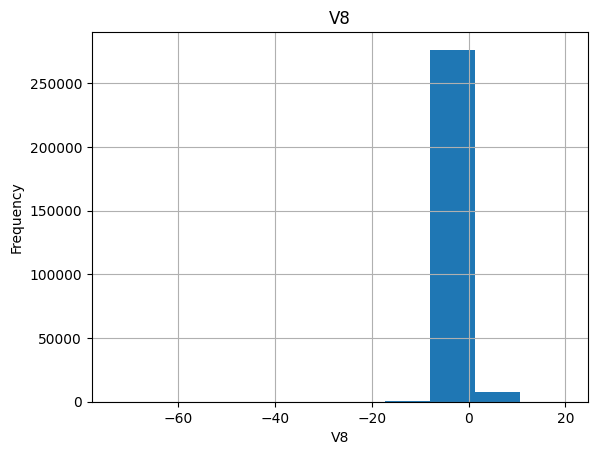

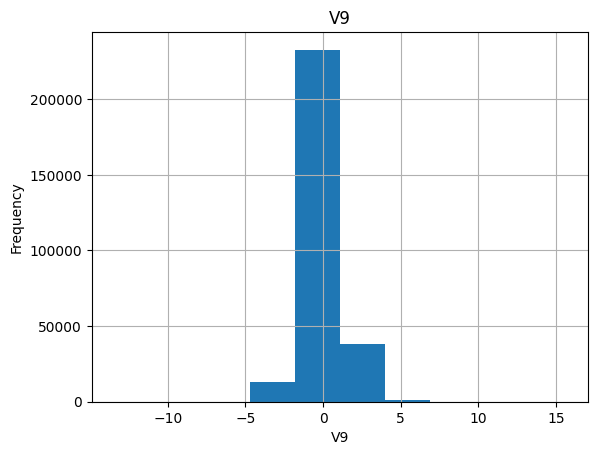

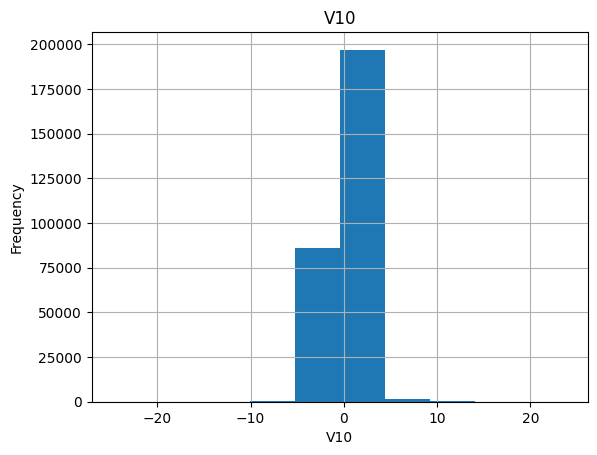

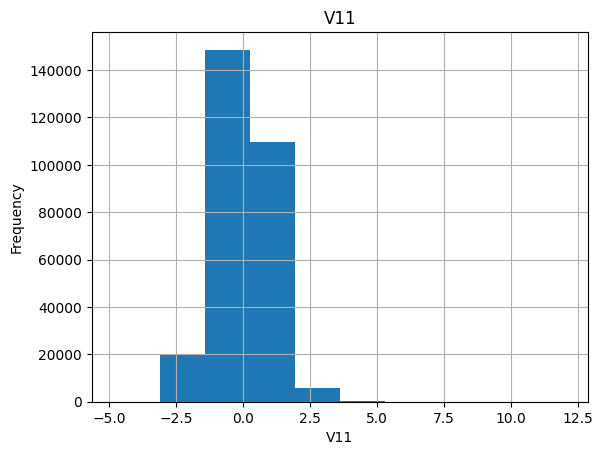

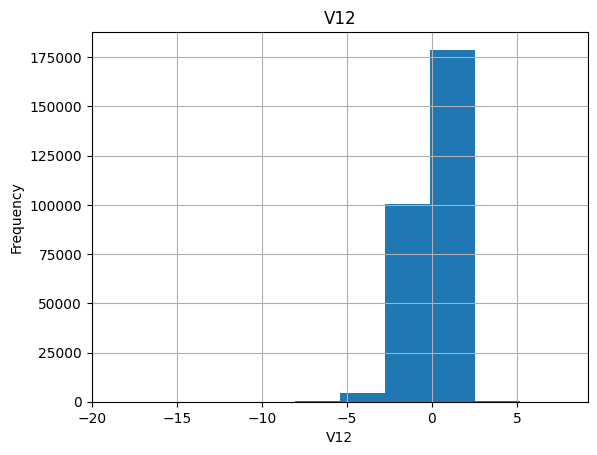

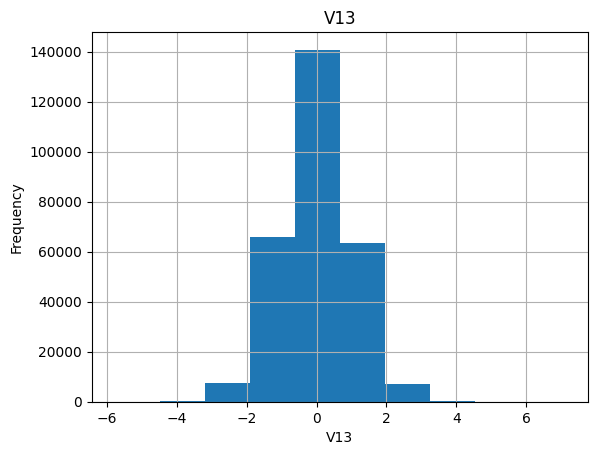

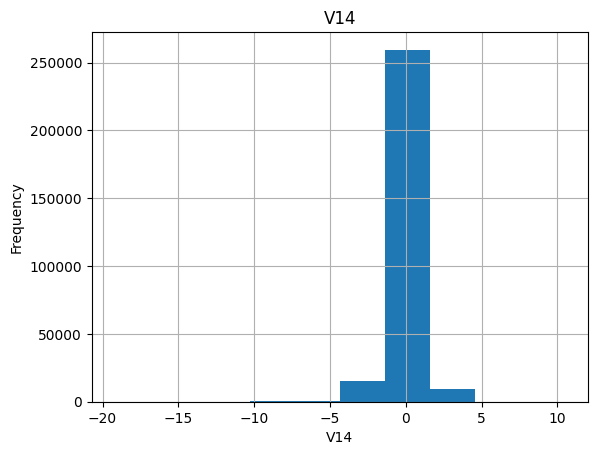

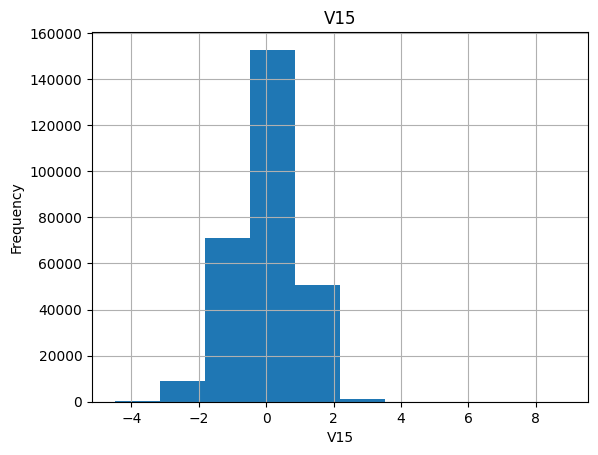

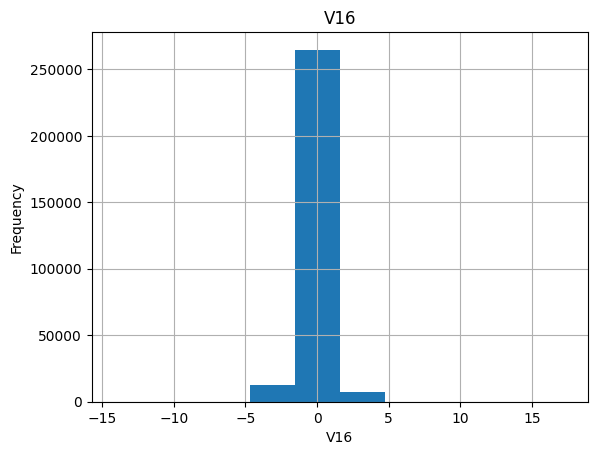

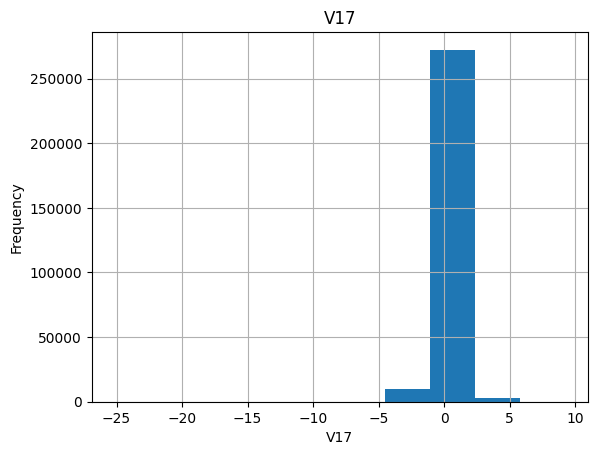

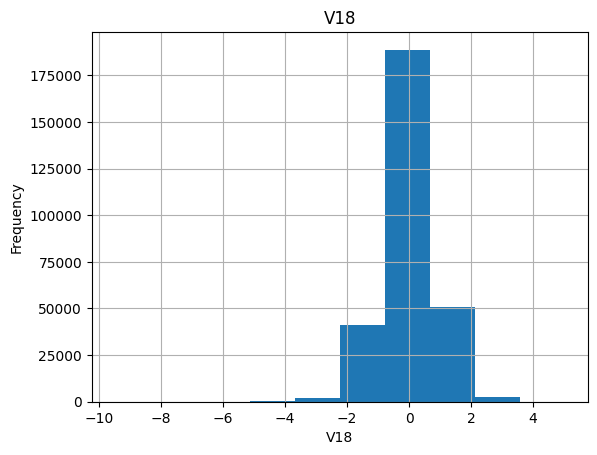

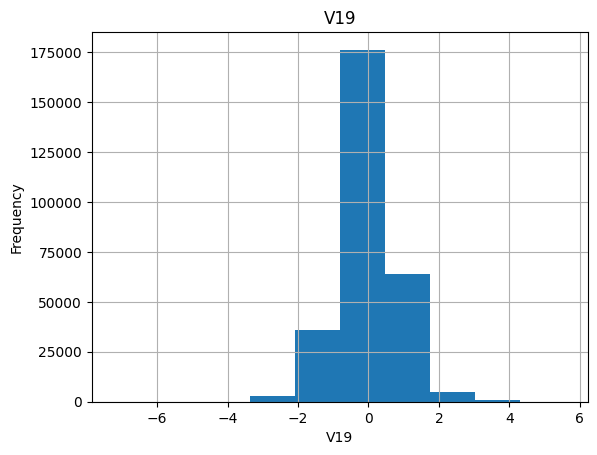

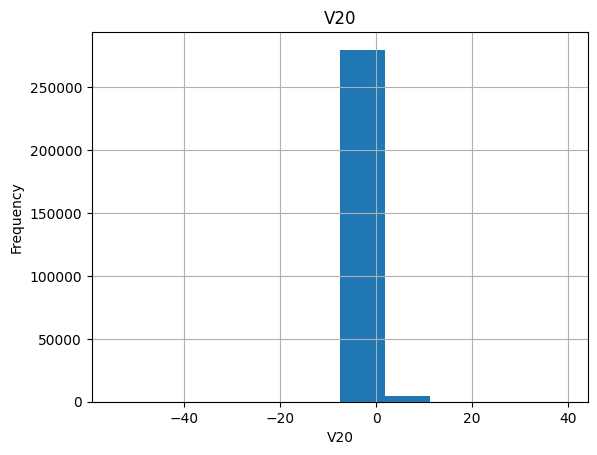

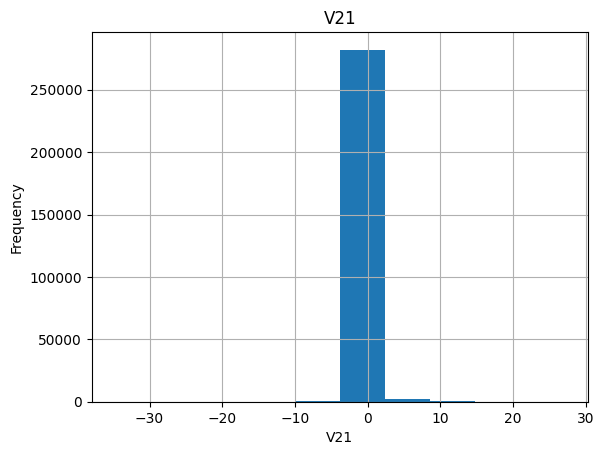

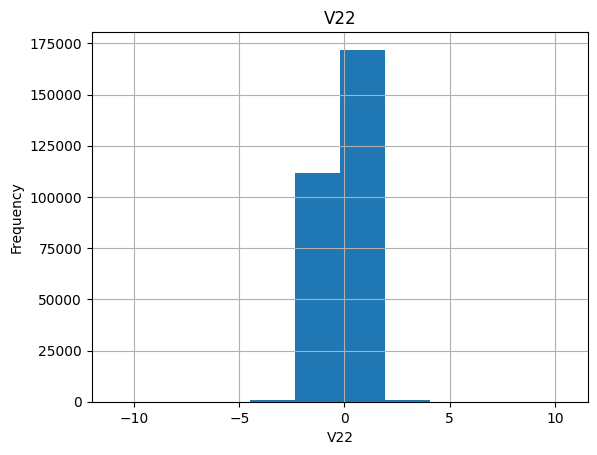

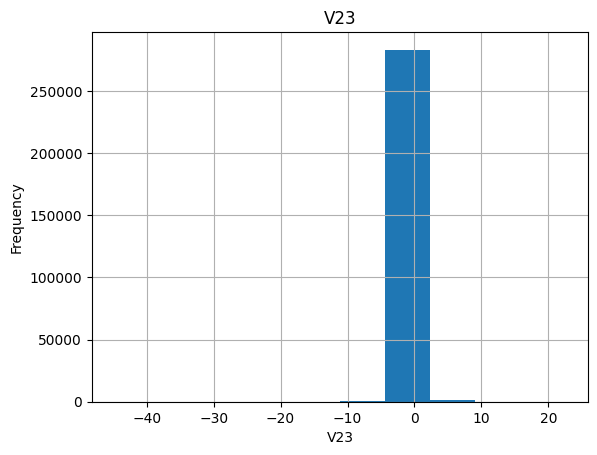

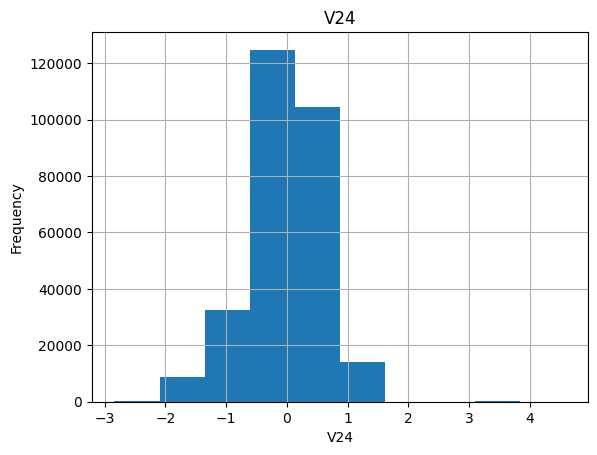

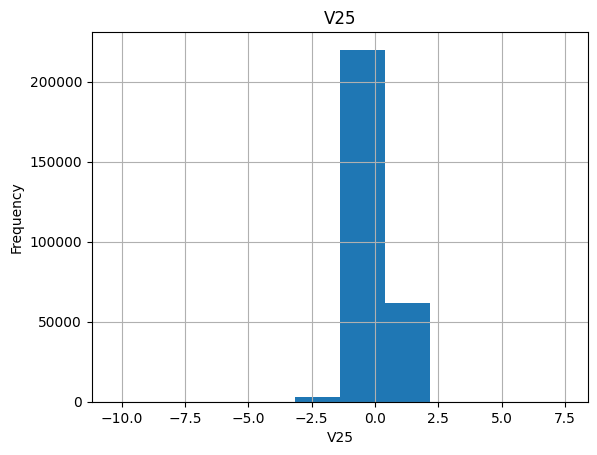

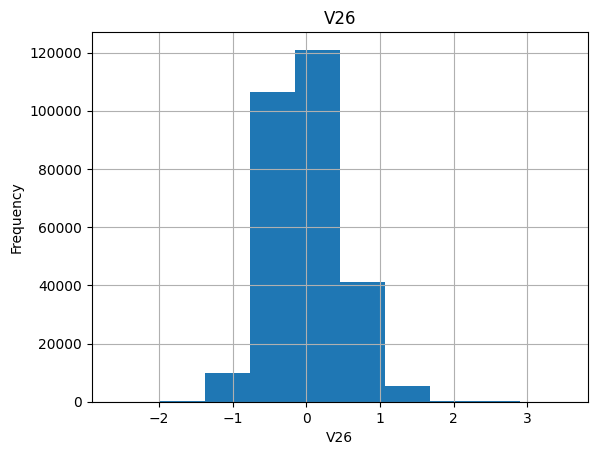

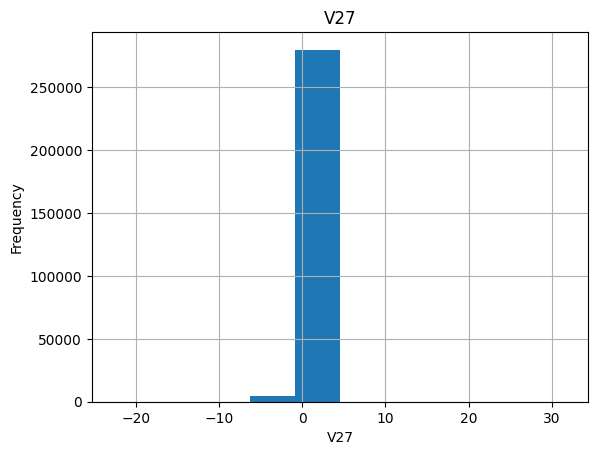

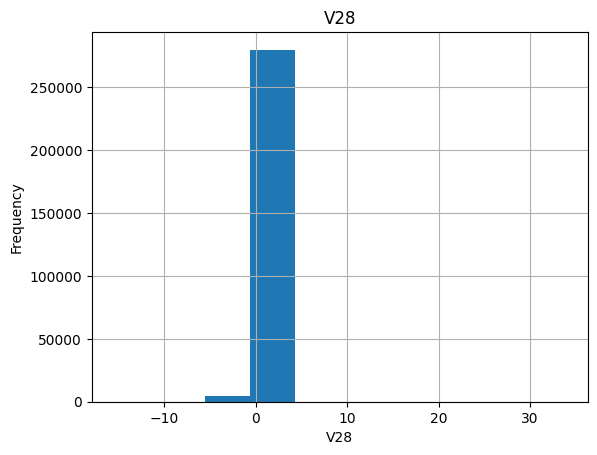

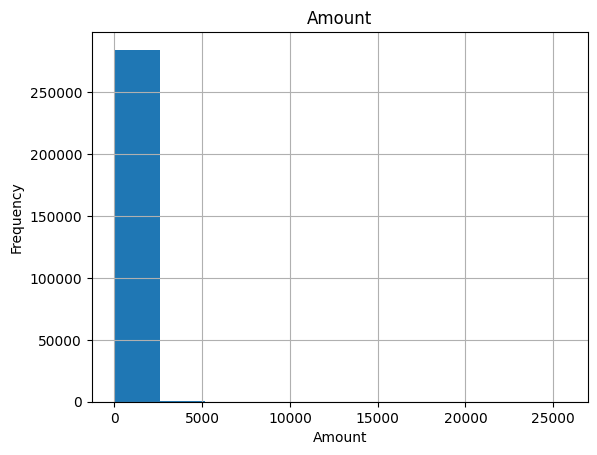

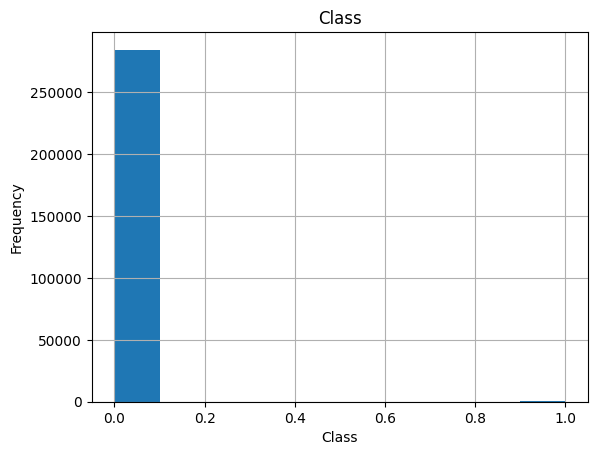

In [23]:
num_col_Creditcard= []
cata_col_Creditcard= []
for col in data_creditcard.columns:
    if pd.api.types.is_numeric_dtype(data_creditcard[col]):  
        num_col_Creditcard.append(col)
    elif pd.api.types.is_object_dtype(data_creditcard[col]):  
        cata_col_Creditcard.append(col)
for col in num_col_Creditcard:
    data_creditcard[col].describe()  
    data_creditcard[col].hist()     
    plt.title(col)              
    plt.xlabel(col)            
    plt.ylabel('Frequency')    
    plt.show() 


In [33]:
print(cata_col_Creditcard)

[]


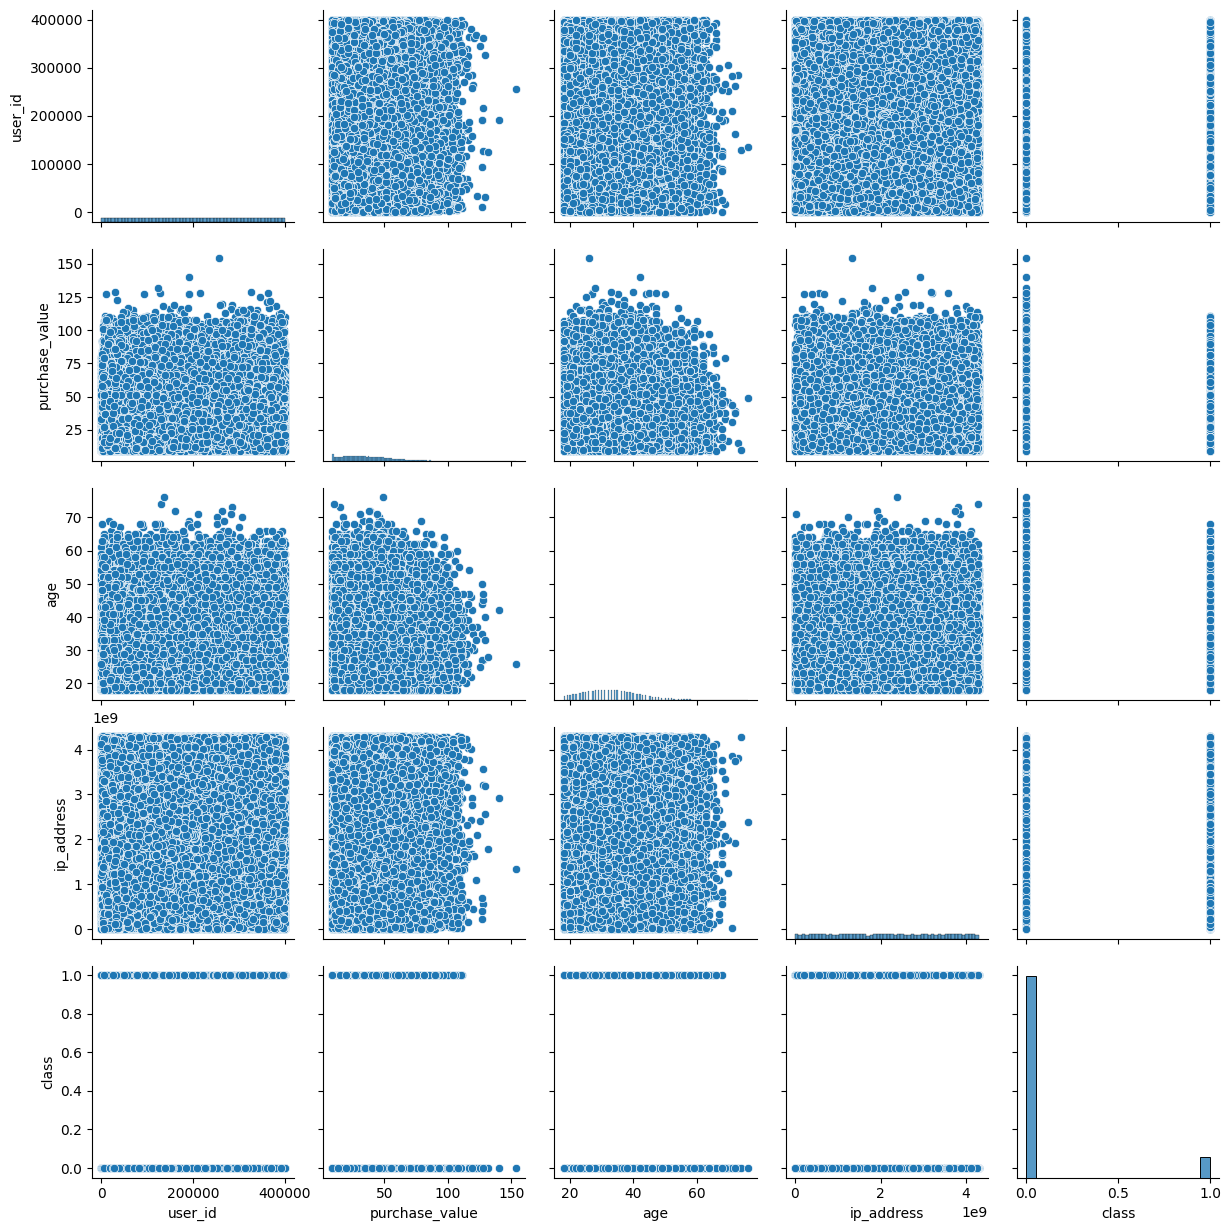

In [24]:
sns.pairplot(data_Fraud) 
plt.show()


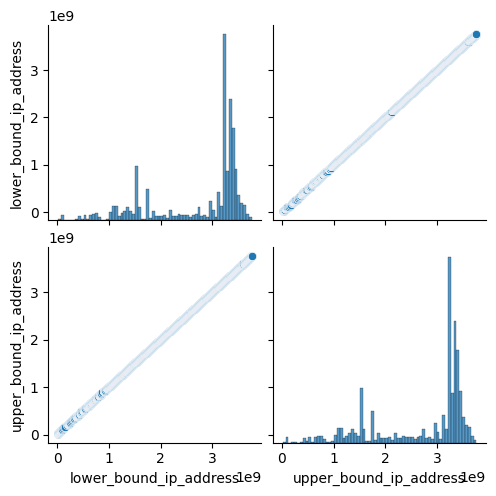

In [25]:
sns.pairplot(data_Ip) 
plt.show()

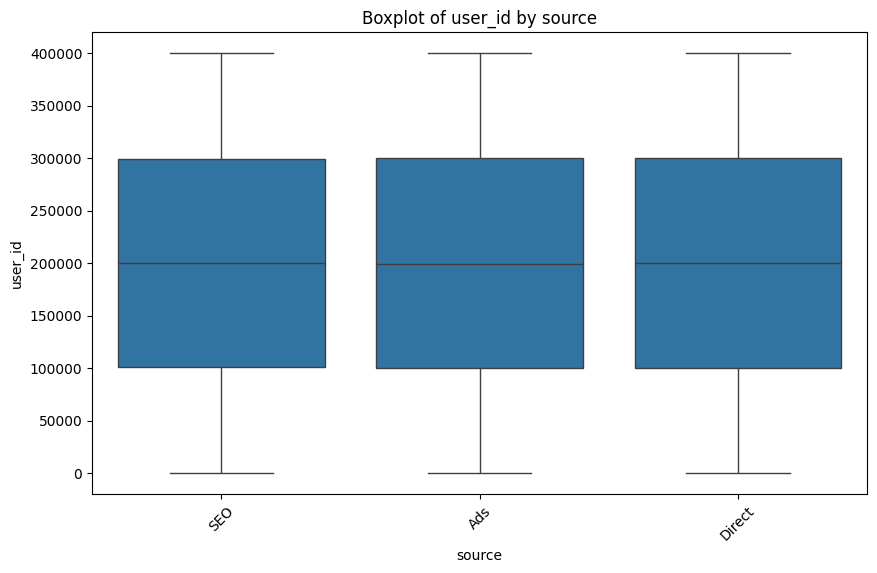

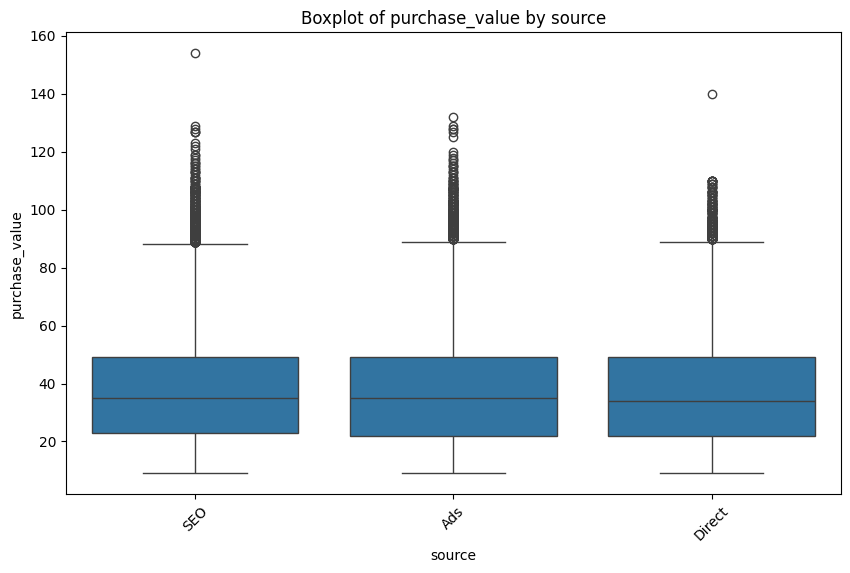

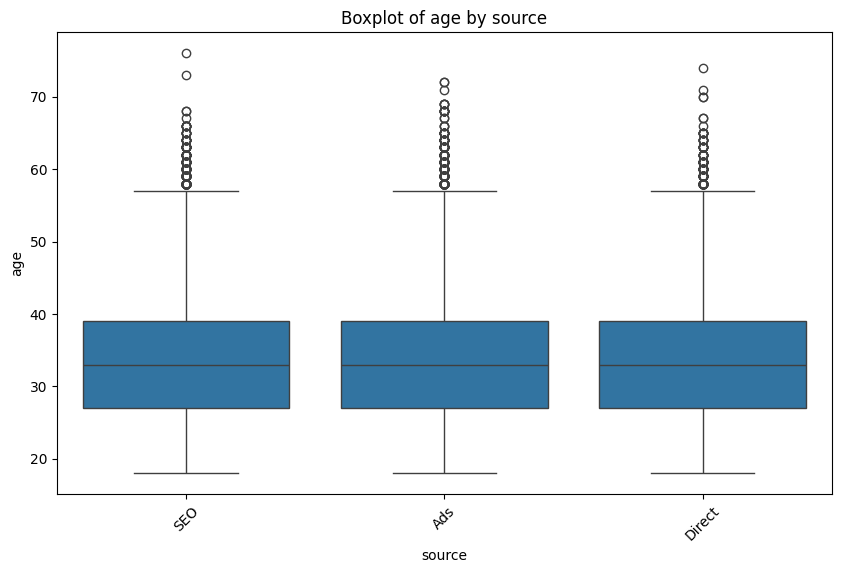

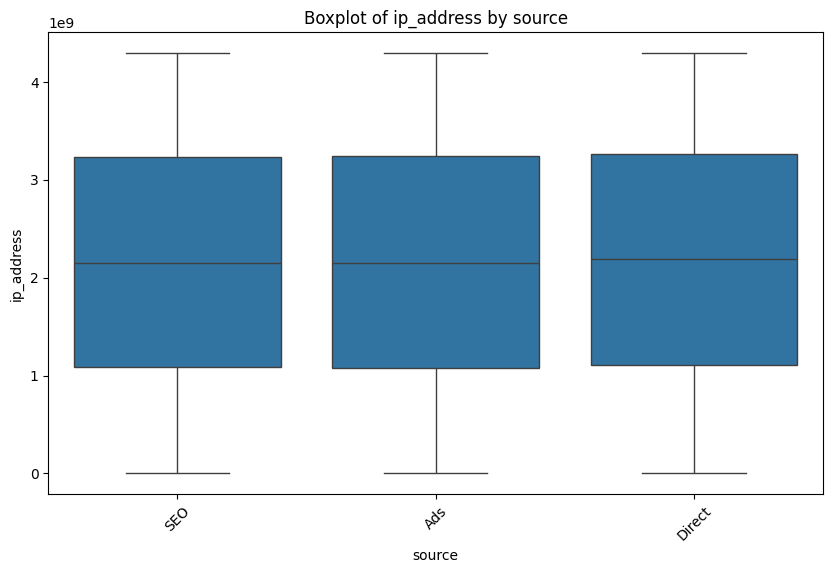

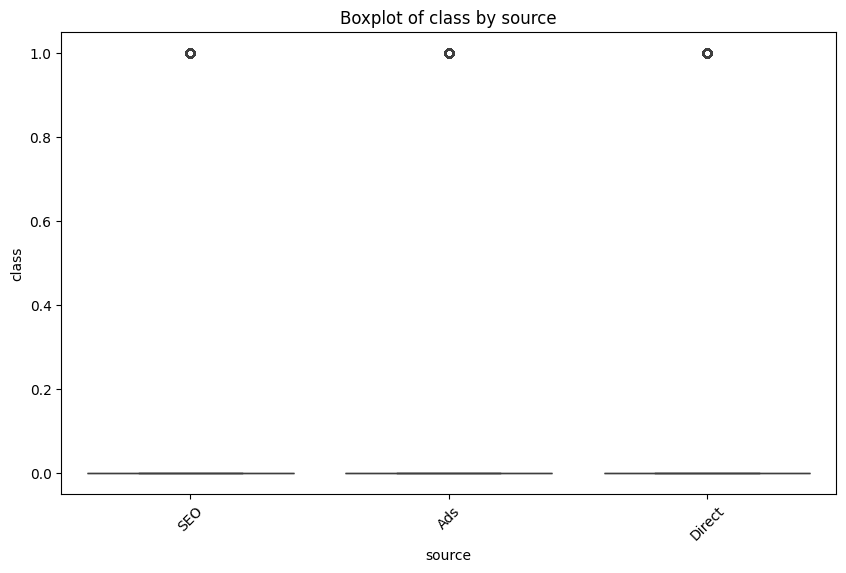

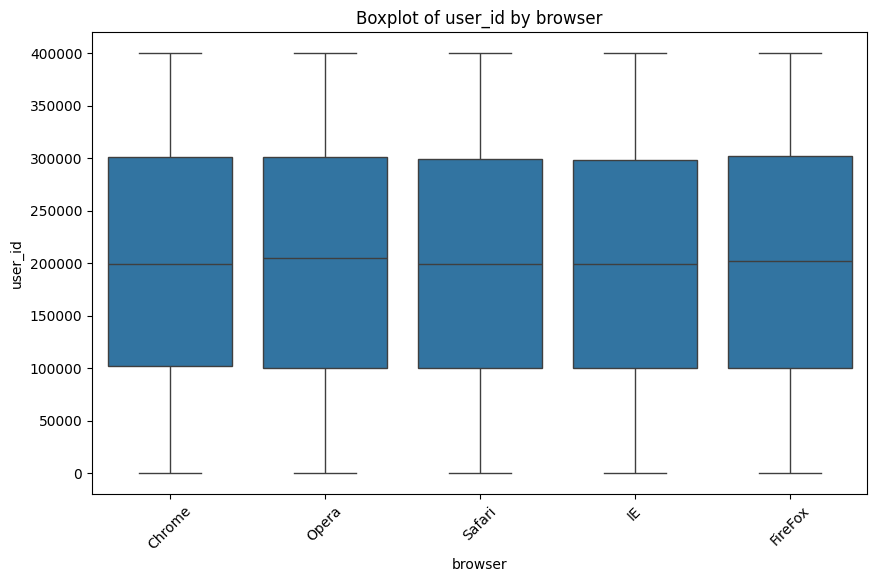

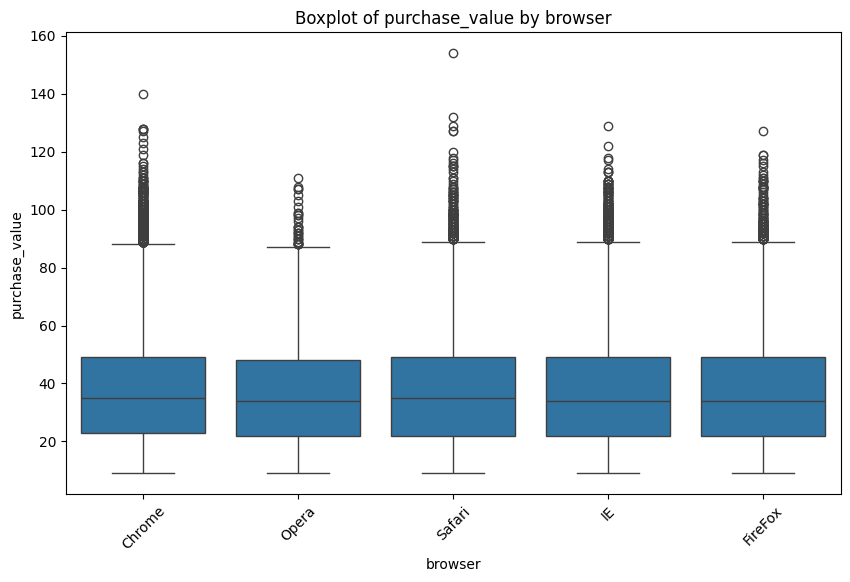

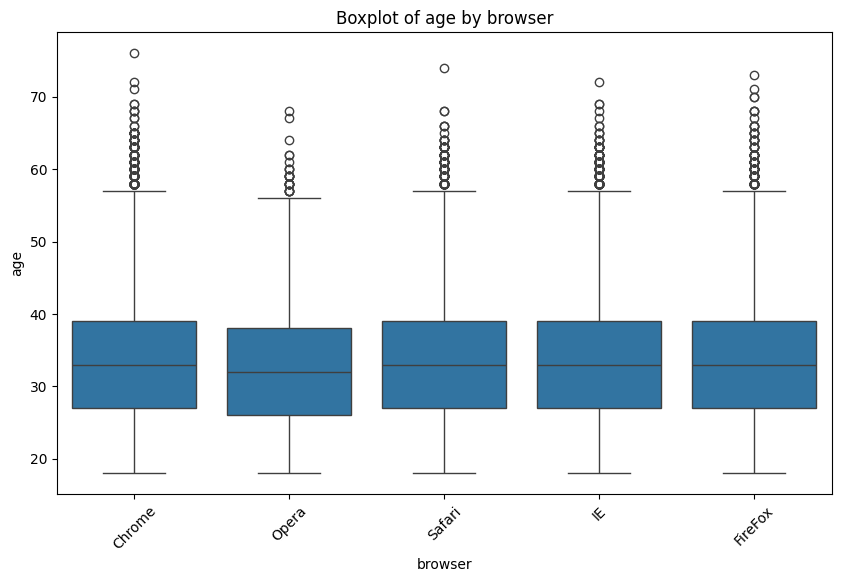

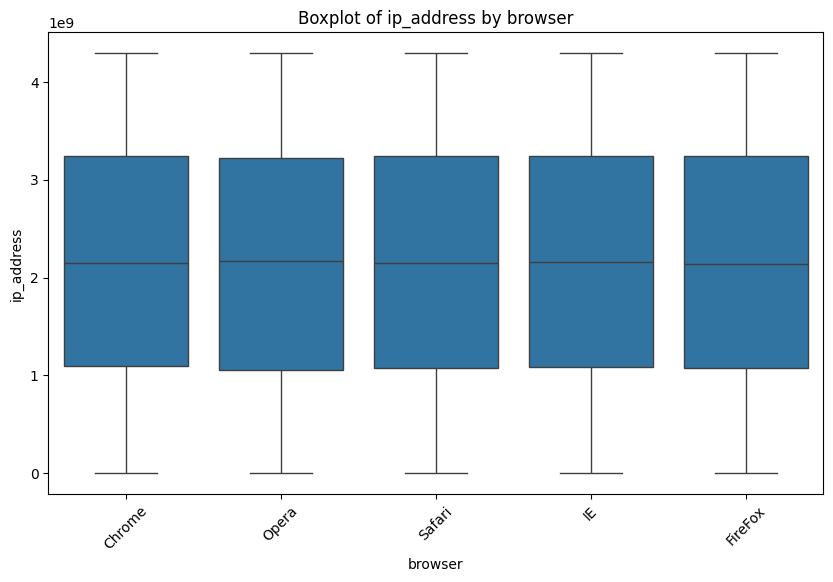

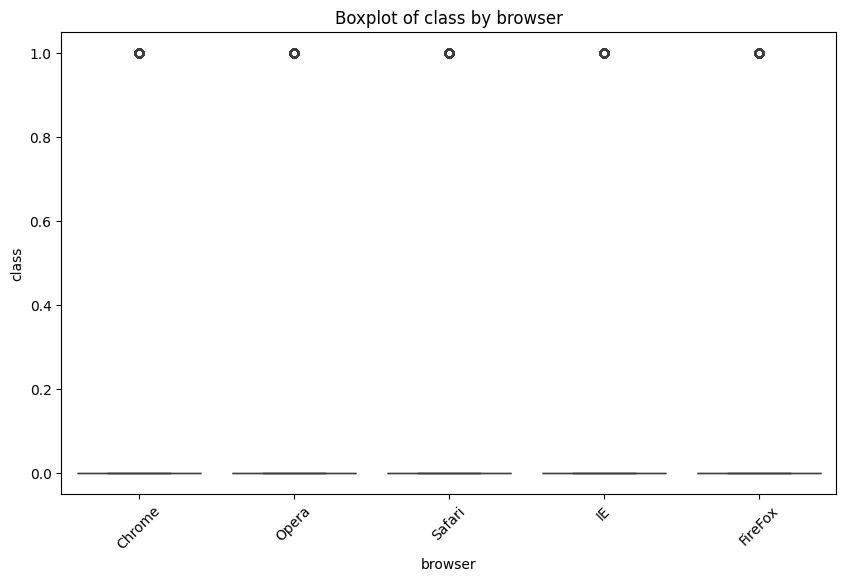

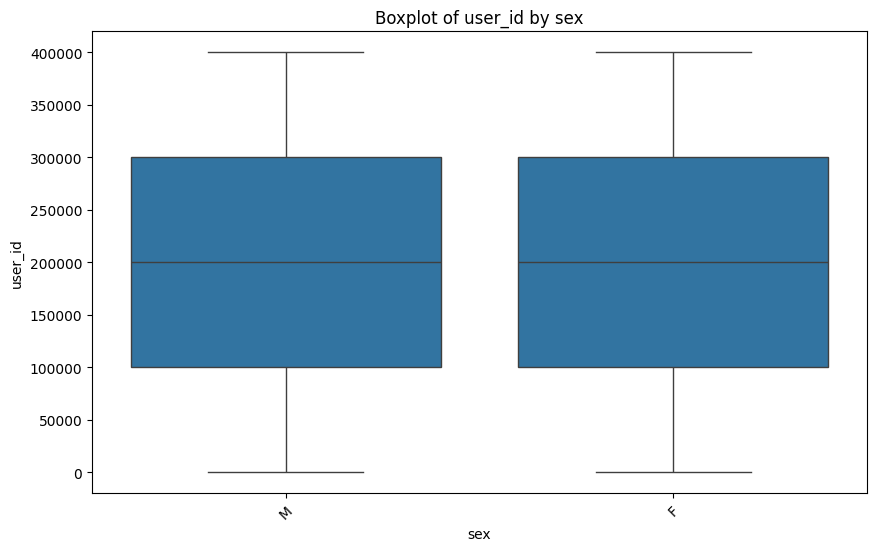

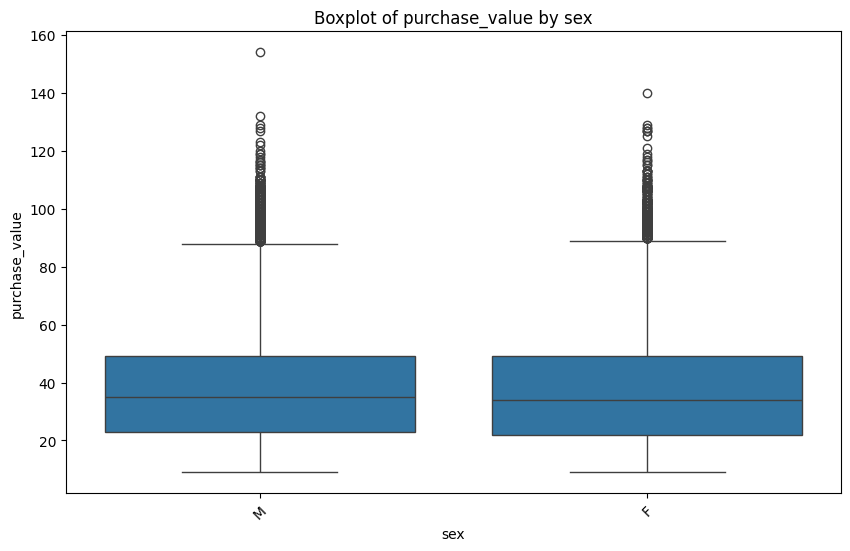

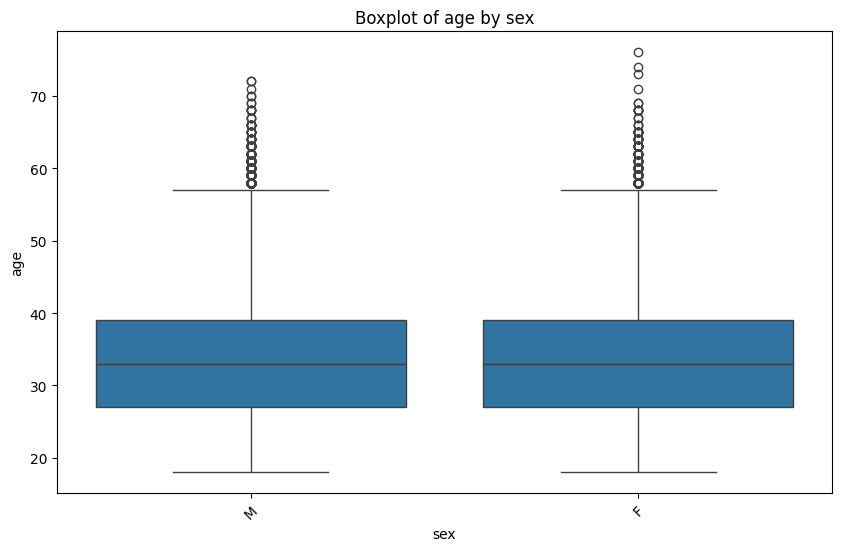

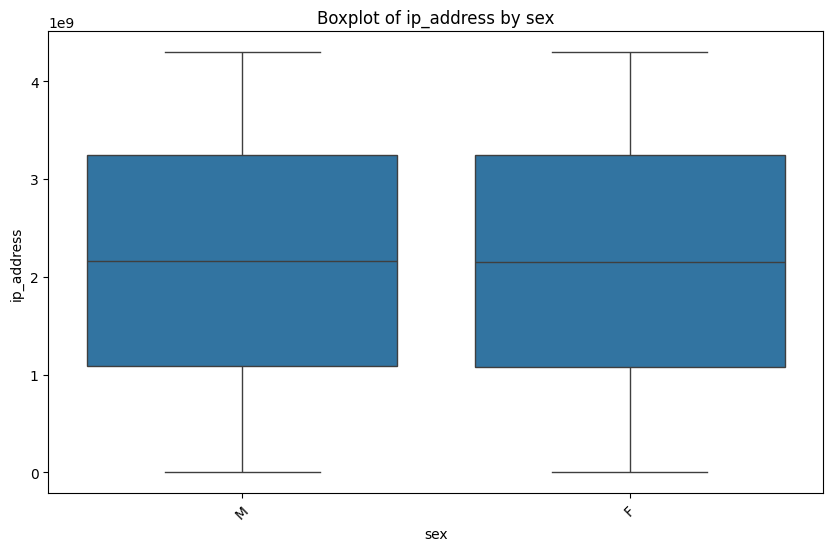

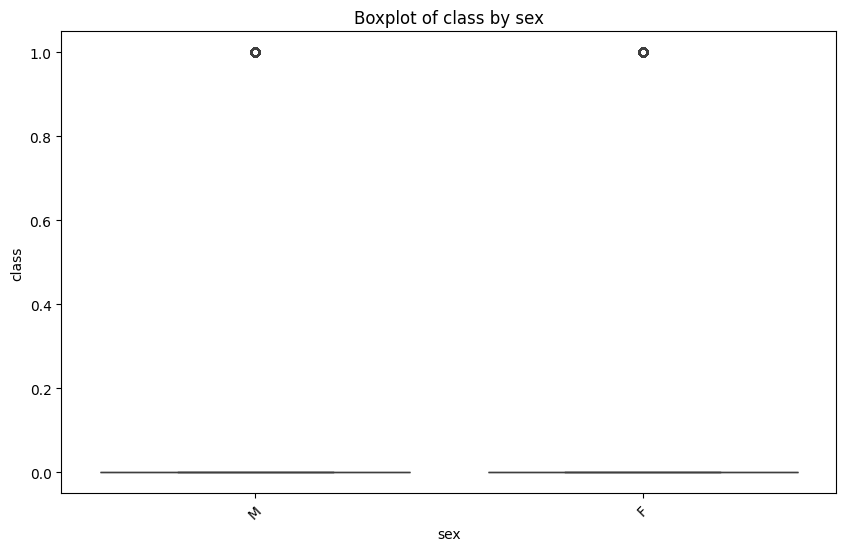

In [9]:
categorical_columns = list(data_Fraud.select_dtypes(include=['object', 'category']).columns)
numerical_columns = list(data_Fraud.select_dtypes(include=['int64', 'float64']).columns)

if "device_id" in categorical_columns:
    categorical_columns.remove("device_id")


for cat_col in categorical_columns:
    for num_col in numerical_columns:
        plt.figure(figsize=(10, 6))  
        sns.boxplot(x=cat_col, y=num_col, data=data_Fraud)
        plt.title(f'Boxplot of {num_col} by {cat_col}')
        plt.xticks(rotation=45)  
        plt.show() 

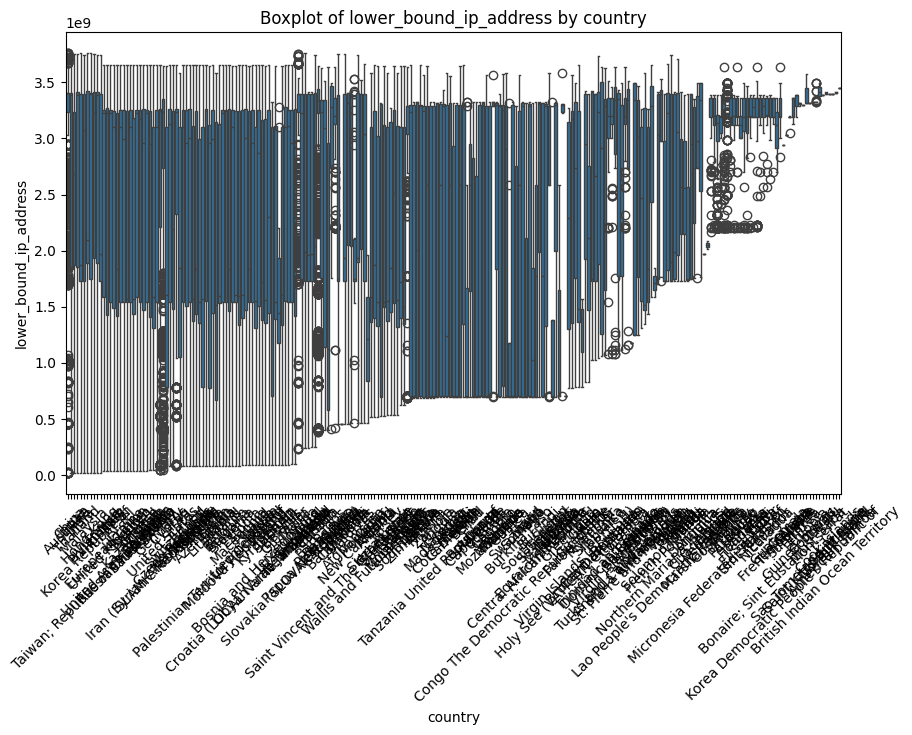

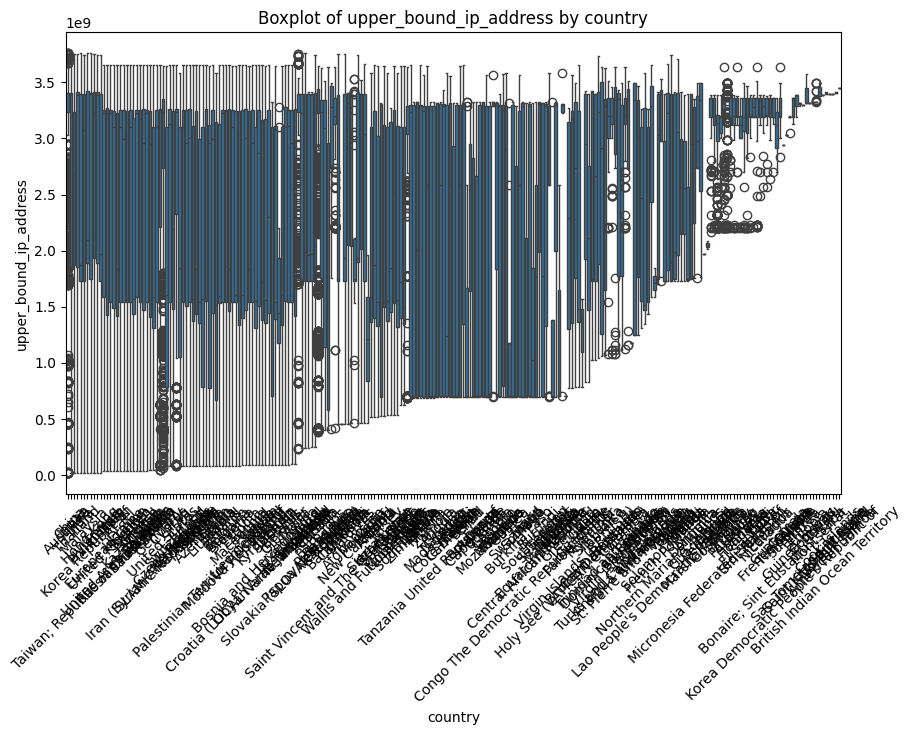

In [6]:
categorical_columns_ip = data_Ip.select_dtypes(include=['object', 'category']).columns
numerical_columns_ip = data_Ip.select_dtypes(include=['int64', 'float64']).columns


for cat_col in categorical_columns_ip:
    for num_col in numerical_columns_ip:
        plt.figure(figsize=(10, 6))  
        sns.boxplot(x=cat_col, y=num_col, data=data_Ip)
        plt.title(f'Boxplot of {num_col} by {cat_col}')
        plt.xticks(rotation=45)
        plt.show()  t

In [11]:
data_Fraud['ip_address'] = data_Fraud['ip_address'].astype(int)


In [12]:
def format_ip_range_scientific(lower, upper):
   
    return f'{lower:.6e} - {upper:.6e}'


data_Ip['ip_address_range'] = data_Ip.apply(lambda row: format_ip_range_scientific(row['lower_bound_ip_address'], row['upper_bound_ip_address']), axis=1)
data_Ip.head()

,lower_bound_ip_address,upper_bound_ip_address,country,ip_address_range
0,16777216.0,16777471,Australia,1.677722e+07 - 1.677747e+07
1,16777472.0,16777727,China,1.677747e+07 - 1.677773e+07
2,16777728.0,16778239,China,1.677773e+07 - 1.677824e+07
3,16778240.0,16779263,Australia,1.677824e+07 - 1.677926e+07
4,16779264.0,16781311,China,1.677926e+07 - 1.678131e+07


In [32]:
results = []


for idx, row in data_Fraud.iterrows():
    ip = row['ip_address']
    
   
    match = data_Ip[(data_Ip['lower_bound_ip_address'] <= ip) & (data_Ip['upper_bound_ip_address'] >= ip)]
    
    if not match.empty:
        
        for _, matched_row in match.iterrows():
            combined_row = row.to_dict() 
            combined_row.update(matched_row.to_dict())  
            results.append(combined_row)


merged_df = pd.DataFrame(results)


In [17]:
merged_df.head()

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class,lower_bound_ip_address,upper_bound_ip_address,country,ip_address_range
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,732758368,0,7.298089e+08,734003199,Japan,7.298089e+08 - 7.340032e+08
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,350311387,0,3.355443e+08,352321535,United States,3.355443e+08 - 3.523215e+08
2,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,39,NAUITBZFJKHWW,Ads,Safari,M,45,415583117,0,4.154982e+08,415629311,United States,4.154982e+08 - 4.156293e+08
3,360585,2015-04-06 07:35:45,2015-05-25 17:21:14,27,HPUCUYLMJBYFW,Ads,Opera,M,34,1692458727,0,1.686110e+09,1694498815,United States,1.686110e+09 - 1.694499e+09
4,182338,2015-01-25 17:49:49,2015-03-23 23:05:42,62,NRFFPPHZYFUVC,Ads,IE,M,31,341674739,0,3.355443e+08,352321535,United States,3.355443e+08 - 3.523215e+08


In [21]:
data_Fraud.head()

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class,transaction_count,time_diff,velocity
116708,2,2015-01-11 03:47:13,2015-02-21 10:03:37,54,FGBQNDNBETFJJ,SEO,Chrome,F,25,880217484,0,1,NaT,NaN
15108,4,2015-06-02 16:40:57,2015-09-26 21:32:16,41,MKFUIVOHLJBYN,Direct,Safari,F,38,-2147483648,0,1,NaT,NaN
46047,8,2015-05-28 07:53:06,2015-08-13 11:53:07,47,SCQGQALXBUQZJ,SEO,Chrome,M,25,356056736,0,1,NaT,NaN
67650,9,2015-05-16 15:58:32,2015-05-20 23:06:42,62,IEZOHXPZBIRTE,SEO,FireFox,M,21,759104706,0,1,NaT,NaN
109067,12,2015-01-10 06:25:12,2015-03-04 20:56:37,35,MSNWCFEHKTIOY,Ads,Safari,M,19,-2147483648,0,1,NaT,NaN


In [27]:
data_Fraud["transaction_count"] = data_Fraud.groupby("user_id")['user_id'].transform('size')


data_Fraud.head()

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class,transaction_count,time_diff,velocity
116708,2,2015-01-11 03:47:13,2015-02-21 10:03:37,54,FGBQNDNBETFJJ,SEO,Chrome,F,25,880217484,0,1,NaT,NaN
15108,4,2015-06-02 16:40:57,2015-09-26 21:32:16,41,MKFUIVOHLJBYN,Direct,Safari,F,38,-2147483648,0,1,NaT,NaN
46047,8,2015-05-28 07:53:06,2015-08-13 11:53:07,47,SCQGQALXBUQZJ,SEO,Chrome,M,25,356056736,0,1,NaT,NaN
67650,9,2015-05-16 15:58:32,2015-05-20 23:06:42,62,IEZOHXPZBIRTE,SEO,FireFox,M,21,759104706,0,1,NaT,NaN
109067,12,2015-01-10 06:25:12,2015-03-04 20:56:37,35,MSNWCFEHKTIOY,Ads,Safari,M,19,-2147483648,0,1,NaT,NaN


In [29]:
data_Fraud["velocity"]=data_Fraud["purchase_time"]-data_Fraud["signup_time"]
data_Fraud.head()

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class,transaction_count,time_diff,velocity
116708,2,2015-01-11 03:47:13,2015-02-21 10:03:37,54,FGBQNDNBETFJJ,SEO,Chrome,F,25,880217484,0,1,NaT,41 days 06:16:24
15108,4,2015-06-02 16:40:57,2015-09-26 21:32:16,41,MKFUIVOHLJBYN,Direct,Safari,F,38,-2147483648,0,1,NaT,116 days 04:51:19
46047,8,2015-05-28 07:53:06,2015-08-13 11:53:07,47,SCQGQALXBUQZJ,SEO,Chrome,M,25,356056736,0,1,NaT,77 days 04:00:01
67650,9,2015-05-16 15:58:32,2015-05-20 23:06:42,62,IEZOHXPZBIRTE,SEO,FireFox,M,21,759104706,0,1,NaT,4 days 07:08:10
109067,12,2015-01-10 06:25:12,2015-03-04 20:56:37,35,MSNWCFEHKTIOY,Ads,Safari,M,19,-2147483648,0,1,NaT,53 days 14:31:25


In [31]:
data_Fraud["signup_time_Hour"]=data_Fraud["signup_time"].dt.hour
data_Fraud["signup_time_day"]=data_Fraud["signup_time"].dt.day
data_Fraud["signup_time_month"]=data_Fraud["signup_time"].dt.month
data_Fraud["signup_time_year"]=data_Fraud["signup_time"].dt.year
data_Fraud["purchase_time_Hour"]=data_Fraud["purchase_time"].dt.hour
data_Fraud["purchase_time_day"]=data_Fraud["purchase_time"].dt.day
data_Fraud["purchase_time_month"]=data_Fraud["purchase_time"].dt.month
data_Fraud["purchase_time_year"]=data_Fraud["purchase_time"].dt.year
data_Fraud.head()


,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,...,time_diff,velocity,signup_time_Hour,signup_time_day,signup_time_month,signup_time_year,purchase_time_Hour,purchase_time_day,purchase_time_month,purchase_time_year
116708,2,2015-01-11 03:47:13,2015-02-21 10:03:37,54,FGBQNDNBETFJJ,SEO,Chrome,F,25,880217484,...,NaT,41 days 06:16:24,3,11,1,2015,10,21,2,2015
15108,4,2015-06-02 16:40:57,2015-09-26 21:32:16,41,MKFUIVOHLJBYN,Direct,Safari,F,38,-2147483648,...,NaT,116 days 04:51:19,16,2,6,2015,21,26,9,2015
46047,8,2015-05-28 07:53:06,2015-08-13 11:53:07,47,SCQGQALXBUQZJ,SEO,Chrome,M,25,356056736,...,NaT,77 days 04:00:01,7,28,5,2015,11,13,8,2015
67650,9,2015-05-16 15:58:32,2015-05-20 23:06:42,62,IEZOHXPZBIRTE,SEO,FireFox,M,21,759104706,...,NaT,4 days 07:08:10,15,16,5,2015,23,20,5,2015
109067,12,2015-01-10 06:25:12,2015-03-04 20:56:37,35,MSNWCFEHKTIOY,Ads,Safari,M,19,-2147483648,...,NaT,53 days 14:31:25,6,10,1,2015,20,4,3,2015


In [33]:
merged_df.head()

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,...,signup_time_month,signup_time_year,purchase_time_Hour,purchase_time_day,purchase_time_month,purchase_time_year,lower_bound_ip_address,upper_bound_ip_address,country,ip_address_range
0,2,2015-01-11 03:47:13,2015-02-21 10:03:37,54,FGBQNDNBETFJJ,SEO,Chrome,F,25,880217484,...,1,2015,10,21,2,2015,8.724152e+08,889192447,United States,8.724152e+08 - 8.891924e+08
1,8,2015-05-28 07:53:06,2015-08-13 11:53:07,47,SCQGQALXBUQZJ,SEO,Chrome,M,25,356056736,...,5,2015,11,13,8,2015,3.523215e+08,369098751,United States,3.523215e+08 - 3.690988e+08
2,16,2015-02-03 13:48:23,2015-03-12 12:46:23,9,FROZWSSWOHZBE,Direct,IE,M,32,578312545,...,2,2015,12,12,3,2015,5.704253e+08,587202559,United States,5.704253e+08 - 5.872026e+08
3,33,2015-08-10 08:30:49,2015-10-28 18:12:41,51,VVQLOMBTOWVDD,Direct,Chrome,F,32,1202326461,...,8,2015,18,28,10,2015,1.202323e+09,1202454527,United States,1.202323e+09 - 1.202455e+09
4,41,2015-01-30 06:43:52,2015-03-23 10:10:08,55,MWDRTHVZSRNWR,Ads,IE,F,28,1649831629,...,1,2015,10,23,3,2015,1.648361e+09,1650458623,United States,1.648361e+09 - 1.650459e+09


In [37]:
merged_df["device_id"].value_counts()

device_id
CQTUVBYIWWWBC    20
ZUSVMDEZRBDTX    20
EQYVNEGOFLAWK    20
KIPFSCNUGOLDP    20
NGQCKIADMZORL    20
                 ..
NRTFYVMTYLFXO     1
QARJIEXWSTZFL     1
TXGJGBXVMZZCN     1
OTRRFUOSBOQQZ     1
ACINFPOJYYUAW     1
Name: count, Length: 68045, dtype: int64

In [35]:
from sklearn.preprocessing import OneHotEncoder
cata_columns=merged_df.select_dtypes(include=["object"]).columns.tolist()

print(cata_columns)
encoder=OneHotEncoder(sparse_output=False)

['device_id', 'source', 'browser', 'sex', 'country', 'ip_address_range']


In [40]:
encoder_data=merged_df.copy()

In [55]:
categorical_columns = encoder_data.select_dtypes(include=['object']).columns.tolist()
categorical_columns.remove("device_id")
categorical_columns.remove("ip_address_range")

#Initialize OneHotEncoder
print(categorical_columns)

['source', 'browser', 'sex', 'country']


In [68]:
encoder = OneHotEncoder(sparse_output=False)


one_hot_encoded = encoder.fit_transform(encoder_data[categorical_columns])


one_hot_df = pd.DataFrame(one_hot_encoded, columns=encoder.get_feature_names_out(categorical_columns))

df_encoded = pd.concat([encoder_data, one_hot_df], axis=1)



df_encoded.head()

,user_id,purchase_value,source,browser,sex,age,ip_address,class,transaction_count,time_diff,...,country_131,country_132,country_133,country_134,country_135,country_136,country_137,country_138,country_139,country_140
0,2,54,2,0,0,25,880217484,0,1,NaT,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,8,47,2,0,1,25,356056736,0,1,NaT,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,16,9,1,2,1,32,578312545,0,1,NaT,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,33,51,1,0,0,32,1202326461,0,1,NaT,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,41,55,0,2,0,28,1649831629,0,1,NaT,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [69]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()


for col in categorical_columns:
    encoder_data[col] = label_encoder.fit_transform(encoder_data[col])
encoder_data.head()

,user_id,purchase_value,source,browser,sex,age,ip_address,class,transaction_count,time_diff,...,signup_time_day,signup_time_month,signup_time_year,purchase_time_Hour,purchase_time_day,purchase_time_month,purchase_time_year,lower_bound_ip_address,upper_bound_ip_address,country
0,2,54,2,0,0,25,880217484,0,1,NaT,...,11,1,2015,10,21,2,2015,8.724152e+08,889192447,136
1,8,47,2,0,1,25,356056736,0,1,NaT,...,28,5,2015,11,13,8,2015,3.523215e+08,369098751,136
2,16,9,1,2,1,32,578312545,0,1,NaT,...,3,2,2015,12,12,3,2015,5.704253e+08,587202559,136
3,33,51,1,0,0,32,1202326461,0,1,NaT,...,10,8,2015,18,28,10,2015,1.202323e+09,1202454527,136
4,41,55,0,2,0,28,1649831629,0,1,NaT,...,30,1,2015,10,23,3,2015,1.648361e+09,1650458623,136


In [70]:
encoder_data = encoder_data.drop(columns=["time_diff","velocity"])


encoder_data.columns

Index(['user_id', 'purchase_value', 'source', 'browser', 'sex', 'age',
       'ip_address', 'class', 'transaction_count', 'signup_time_Hour',
       'signup_time_day', 'signup_time_month', 'signup_time_year',
       'purchase_time_Hour', 'purchase_time_day', 'purchase_time_month',
       'purchase_time_year', 'lower_bound_ip_address',
       'upper_bound_ip_address', 'country'],
      dtype='object')

In [72]:
from sklearn.preprocessing import MinMaxScaler 
scaler=MinMaxScaler()

Normalize_data=scaler.fit_transform(encoder_data)
Normalize_data_df=pd.DataFrame(Normalize_data,columns=encoder_data.columns)


Normalize_data_df.head()

,user_id,purchase_value,source,browser,sex,age,ip_address,class,transaction_count,signup_time_Hour,signup_time_day,signup_time_month,signup_time_year,purchase_time_Hour,purchase_time_day,purchase_time_month,purchase_time_year,lower_bound_ip_address,upper_bound_ip_address,country
0,0.000000,0.310345,1.0,0.0,0.0,0.129630,0.408458,0.0,0.0,0.130435,0.333333,0.000000,0.0,0.434783,0.666667,0.090909,0.0,0.408000,0.412698,0.971429
1,0.000015,0.262069,1.0,0.0,1.0,0.129630,0.160499,0.0,0.0,0.304348,0.900000,0.571429,0.0,0.478261,0.400000,0.636364,0.0,0.160000,0.166666,0.971429
2,0.000035,0.000000,0.5,0.5,1.0,0.259259,0.265639,0.0,0.0,0.565217,0.066667,0.142857,0.0,0.521739,0.366667,0.181818,0.0,0.264000,0.269841,0.971429
3,0.000078,0.289655,0.5,0.0,0.0,0.259259,0.560835,0.0,0.0,0.347826,0.300000,1.000000,0.0,0.782609,0.900000,0.818182,0.0,0.565312,0.560887,0.971429
4,0.000098,0.317241,0.0,0.5,0.0,0.185185,0.772532,0.0,0.0,0.260870,0.966667,0.000000,0.0,0.434783,0.733333,0.181818,0.0,0.778000,0.772817,0.971429


In [73]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
standard_scaler_data=scaler.fit_transform(encoder_data)
standard_scaler_df=pd.DataFrame(standard_scaler_data, columns=encoder_data.columns)
standard_scaler_df.head()

,user_id,purchase_value,source,browser,sex,age,ip_address,class,transaction_count,signup_time_Hour,signup_time_day,signup_time_month,signup_time_year,purchase_time_Hour,purchase_time_day,purchase_time_month,purchase_time_year,lower_bound_ip_address,upper_bound_ip_address,country
0,-1.740520,0.927081,1.109989,-0.954229,-1.184506,-0.938367,-0.319205,-0.322226,0.0,-1.231501,-0.424773,-1.397316,0.0,-0.217136,0.647599,-1.508631,0.0,-0.326234,-0.310185,0.828348
1,-1.740468,0.546375,1.109989,-0.954229,0.844234,-0.938367,-1.175647,-0.322226,0.0,-0.651965,1.522601,0.375770,0.0,-0.072408,-0.260063,0.747627,0.0,-1.173272,-1.162711,0.828348
2,-1.740399,-1.520310,-0.007790,0.432726,0.844234,-0.128956,-0.812496,-0.322226,0.0,0.217340,-1.341184,-0.954045,0.0,0.072321,-0.373521,-1.132588,0.0,-0.818062,-0.805200,0.828348
3,-1.740251,0.763921,-0.007790,-0.954229,-1.184506,-0.128956,0.207099,-0.322226,0.0,-0.507080,-0.539325,1.705584,0.0,0.940692,1.441804,1.499714,0.0,0.211063,0.203307,0.828348
4,-1.740182,0.981467,-1.125569,0.432726,-1.184506,-0.591476,0.938291,-0.322226,0.0,-0.796849,1.751704,-1.397316,0.0,-0.217136,0.874515,-1.132588,0.0,0.937492,0.937666,0.828348
